In [23]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
train_path = "cats-and-dogs/train"
valid_path = "cats-and-dogs/valid"
test_path = "cats-and-dogs/test"

In [26]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=10)

Found 800 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [27]:
def plots(ims, figsize=(20,10), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [28]:
imgs, labels = next(train_batches)

C:\Users\Jayesh Bhadane\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


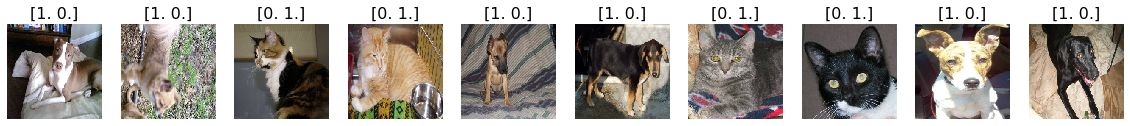

In [29]:
plots(imgs, titles=labels)

In [30]:
model = Sequential([
            Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
            Flatten(),
            Dense(2, activation="softmax"),
        ])


In [31]:
model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
10/10 - 1s - loss: 1912.8671 - accuracy: 0.4300 - val_loss: 1471.3727 - val_accuracy: 0.5000
Epoch 2/5
10/10 - 1s - loss: 1069.8063 - accuracy: 0.5100 - val_loss: 209.8126 - val_accuracy: 0.6250
Epoch 3/5
10/10 - 1s - loss: 375.3116 - accuracy: 0.5800 - val_loss: 142.2722 - val_accuracy: 0.5625
Epoch 4/5
10/10 - 2s - loss: 233.6718 - accuracy: 0.5200 - val_loss: 304.7109 - val_accuracy: 0.5000
Epoch 5/5
10/10 - 1s - loss: 454.3309 - accuracy: 0.4800 - val_loss: 322.3440 - val_accuracy: 0.5625


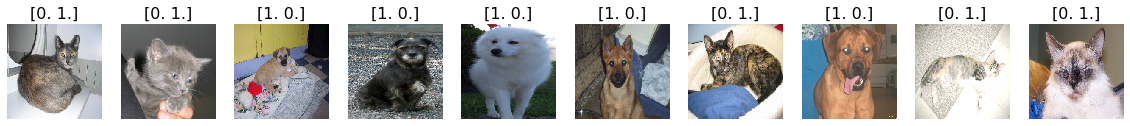

In [33]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [34]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 0.], dtype=float32)

In [35]:
predictions = model.predict(test_batches, steps=1, verbose=0)
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [36]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [37]:
def plot_confusion_matrix(cm, classes,                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
     This is the function that will plot confusion matrix.
     Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix Without Normalization
[[5 0]
 [5 0]]


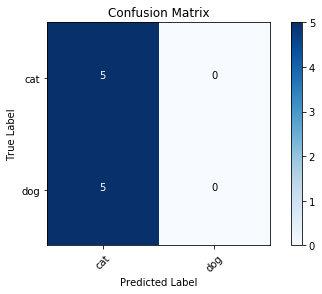

In [38]:
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16

In [42]:
vgg16_model = VGG16()

553467904/553467096 [==============================] - 181s 0us/step


In [58]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [59]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [61]:
for layer in model.layers:
    layer.trainable = False

In [62]:
model.add(Dense(2, activation="softmax"))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [64]:
model.compile(Adam(lr=.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [65]:
model.fit(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=20, verbose=2)

Epoch 1/20
4/4 - 9s - loss: 1.2796 - accuracy: 0.4500 - val_loss: 0.9223 - val_accuracy: 0.5000
Epoch 2/20
4/4 - 8s - loss: 1.0680 - accuracy: 0.4500 - val_loss: 0.7643 - val_accuracy: 0.6875
Epoch 3/20
4/4 - 9s - loss: 0.9144 - accuracy: 0.5000 - val_loss: 0.6707 - val_accuracy: 0.6875
Epoch 4/20
4/4 - 10s - loss: 0.6164 - accuracy: 0.7000 - val_loss: 0.5855 - val_accuracy: 0.7500
Epoch 5/20
4/4 - 10s - loss: 0.5043 - accuracy: 0.7750 - val_loss: 0.5167 - val_accuracy: 0.7500
Epoch 6/20
4/4 - 10s - loss: 0.4997 - accuracy: 0.8250 - val_loss: 0.4503 - val_accuracy: 0.8750
Epoch 7/20
4/4 - 10s - loss: 0.5820 - accuracy: 0.8000 - val_loss: 0.3800 - val_accuracy: 0.8750
Epoch 8/20
4/4 - 10s - loss: 0.3045 - accuracy: 0.8250 - val_loss: 0.3214 - val_accuracy: 0.8750
Epoch 9/20
4/4 - 10s - loss: 0.2674 - accuracy: 0.8500 - val_loss: 0.2928 - val_accuracy: 0.8750
Epoch 10/20
4/4 - 10s - loss: 0.3646 - accuracy: 0.8750 - val_loss: 0.2731 - val_accuracy: 0.8750
Epoch 11/20
4/4 - 11s - loss: 0.

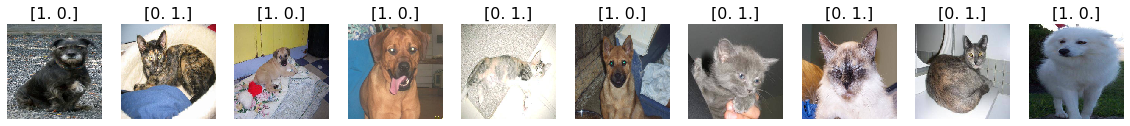

In [66]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [67]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)

In [68]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [69]:
predictions

array([[6.5588057e-01, 3.4411946e-01],
       [8.4053516e-02, 9.1594648e-01],
       [9.9354702e-01, 6.4529185e-03],
       [9.2159837e-01, 7.8401566e-02],
       [4.1891158e-01, 5.8108842e-01],
       [2.1063976e-01, 7.8936028e-01],
       [6.4777690e-03, 9.9352223e-01],
       [2.2267757e-03, 9.9777323e-01],
       [4.5214856e-06, 9.9999547e-01],
       [9.7483099e-01, 2.5169000e-02]], dtype=float32)

In [70]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion Matrix Without Normalization
[[5 0]
 [1 4]]


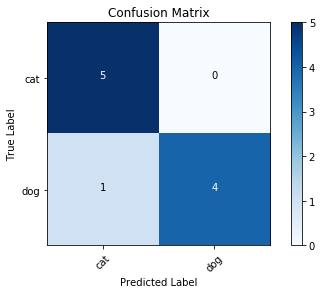

In [71]:
cm_plots_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plots_labels, title="Confusion Matrix")